<a href="https://colab.research.google.com/github/serdargoler/serdargoler/blob/master/crypto_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

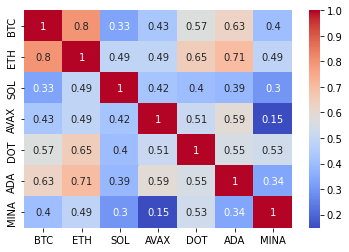

In [4]:
!pip install fastquant
import fastquant as fq
import matplotlib.pyplot as plt
import seaborn as sns

currency = "USDT"
metric = "close"
start = '2020-01-01'
end = '2021-10-30'
crypto = ["BTC", "ETH", "SOL", "AVAX", "DOT", "ADA", "MINA"]

colnames = []
first = True

for ticker in crypto:
    data = fq.get_crypto_data(f'{ticker}/{currency}', start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

combined = combined.pct_change().corr(method='pearson')
sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()